# Understanding Seaborn

If you're familiar with the `R` language, you know that `ggplot` is a great resource to plot data and interpret it. Similarly, in `Python`, the equivalent library is `matplotlib`. However, the functionality and appearance of the plots using matplotlib are not high and as a result a better alternative is needed. This is where `seaborn` steps in and steals the show.

Let's take a deep dive on the various plots that we can make using `seaborn` and see how easy it is to do so.

## Import data

I'll work with the dataset about **California House Prices** dataset also available on [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices).

In [7]:
import pandas as pd

dataset = pd.read_csv("dataset.csv")

In [8]:
print("Dataset: {}".format(dataset.shape))
print("Columns: {}".format(dataset.columns))
dataset.head(5)

Dataset: (20640, 10)
Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


There are **20640 rows** with **10 columns**. We can leverage the datasets and the valuable information it hides to plot data and infer from it.

## Seaborn library

Let's import the `seaborn` library to get started.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Scatter plot

A scatter plot helps describe a good relation between two quanities. Here, let's see the relation between the number of rooms and the number of bedrooms.

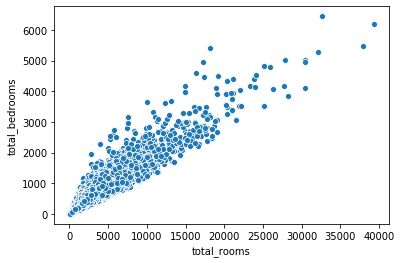

In [10]:
sns.scatterplot(x = 'total_rooms', y = 'total_bedrooms', data = dataset)

We can see an almost linear relationship between `rooms` and `bedrooms`. However, the plot is not very intuitive. Let's make this more informative and descriptive.

Text(0, 0.5, 'Total bedrooms')

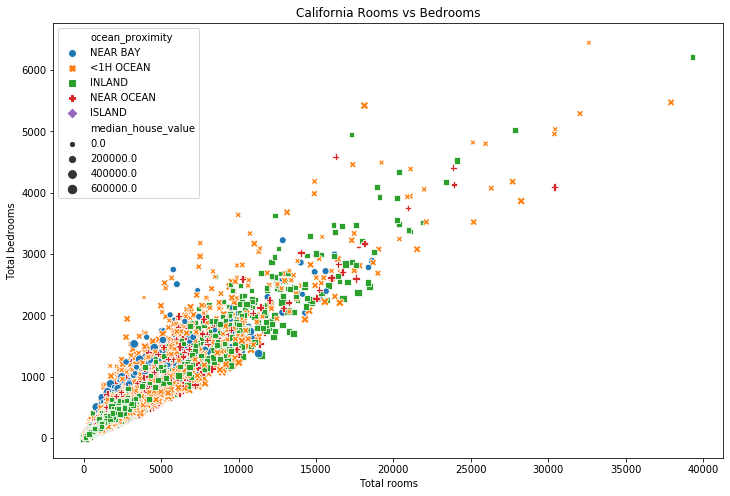

In [11]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = dataset,
               x = 'total_rooms', 
               y = 'total_bedrooms',
               size = 'median_house_value', 
               hue = 'ocean_proximity', 
               style = 'ocean_proximity')
plt.title("California Rooms vs Bedrooms")
plt.xlabel("Total rooms")
plt.ylabel("Total bedrooms")

As you can see, we improved the plot so much. We added the size of each point based on the `median_house_value` and added a legend for it too. Next, the `hue` provides different colors based on the categorical column defining proximity to the ocean. The same column also helps us to define various markers using `style`.

## Count Plot

Count plots are a great tool to desribe categorical information. For example, in this dataset we could see how the dataset is ditributed based on `ocean_proximity`.

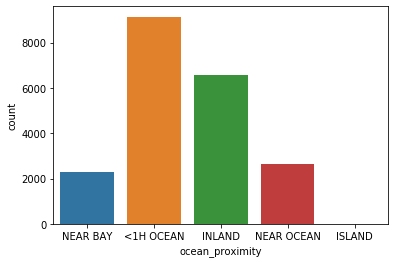

In [12]:
sns.countplot(x = 'ocean_proximity', data = dataset)

We can see how it already calculates each column value and presents it as a bar. `<1H OCEAN` has the highest value while `ISLAND` is almost negligible. However, the plot does not tell what the actual values are. Let's plot them and see. Also, something to note about the dataset is that it's not very descriptive. For example, the value `<1H OCEAN` does not describe what H means here and neither does the metadata for this dataset.

Text(0, 0.5, 'Count of houses')

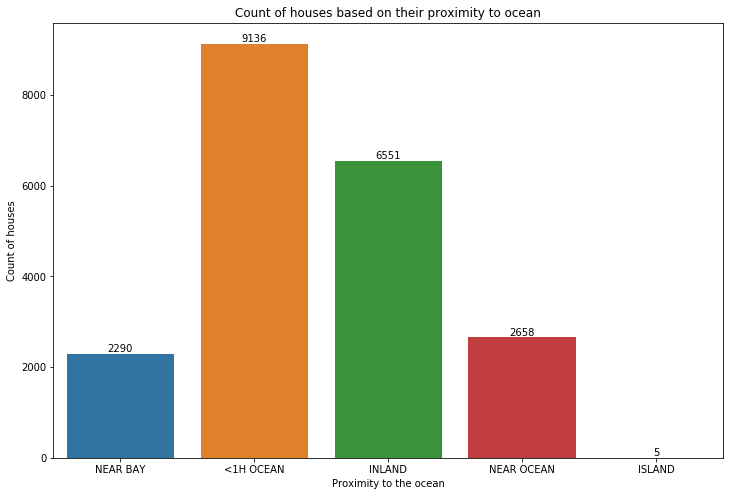

In [18]:
plt.figure(figsize = (12, 8))
ocean_plot = sns.countplot(x = 'ocean_proximity', data = dataset)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Proximity to the ocean")
plt.ylabel("Count of houses")

Well, now the plot looks so much better than before and even makes each bar more descriptive.

## Histograms

Histograms look similar to bar plots but they are used to express continuous values into separate bins. Let's describe the median house prices in California and see what that looks like. The good thing about `seaborn` is that it has the density plot built into the histogram and is called the `dist` plot.

Text(0, 0.5, 'Value')

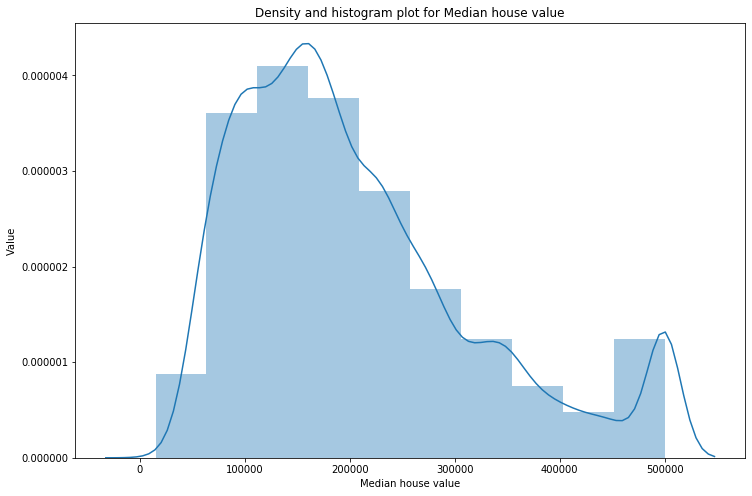

In [26]:
plt.figure(figsize = (12, 8))
sns.distplot(a = dataset['median_house_value'], bins = 10, hist = True)
plt.title("Density and histogram plot for Median house value")
plt.xlabel("Median house value")
plt.ylabel("Value")

The data looks a little skewed towards the left side and looks quite **normal**. However, in the end, there is an unusual spike around 500,000.

## Box plots

Box plots provide a good way to view how the data is spread. Furthermore, when we combine the same plot with `swarm` plots which plot non overlapping points, more information can be portraied easily.

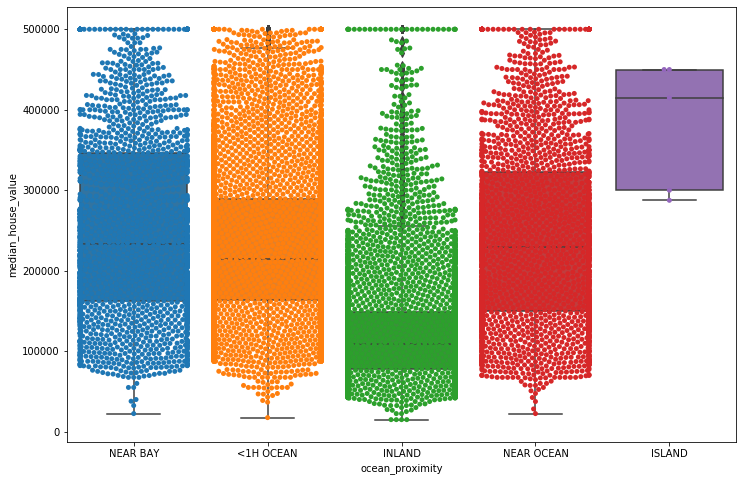

In [35]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = dataset)
sns.swarmplot(x = 'ocean_proximity', y = 'median_house_value', data = dataset)
plt.title("Box plots of house values based on ocean proximity")
plt.xlabel("Ocean proximity")
plt.ylabel("Median house value")

The combined plots show that houses on `ISLAND` are the most expensive ones in the whole range. While for all others, the range is quite varied.

## Violin plots

Violin plots are similar to box plots but take into account the densities.

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)